# Análise Exploratória dos Dados - Obesidade


Este notebook tem como objetivo realizar a análise exploratória da base de dados `Obesity.csv`,
fornecida no Tech Challenge 4 do curso de Data Analytics da FIAP, com foco em compreender os fatores associados à obesidade
e embasar as decisões de pré-processamento e modelagem preditiva.

## Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

## Carregamento da base de dados

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/RickPardono/TechChallenge4_Fiap/refs/heads/main/data/raw/Obesity.csv")

## Visualização das primeiras linhas

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Dimensões, valores nulos e tipos de dados

In [4]:
df.shape

(2111, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

## Estatísticas descritivas

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Distribuição das classes da variável alvo

In [7]:
df["Obesity"].value_counts(normalize=True) * 100

,proportion
Obesity,
Obesity_Type_I,16.627191
Obesity_Type_III,15.348176
Obesity_Type_II,14.069162
Overweight_Level_I,13.737565
Overweight_Level_II,13.737565
Normal_Weight,13.595452
Insufficient_Weight,12.884889


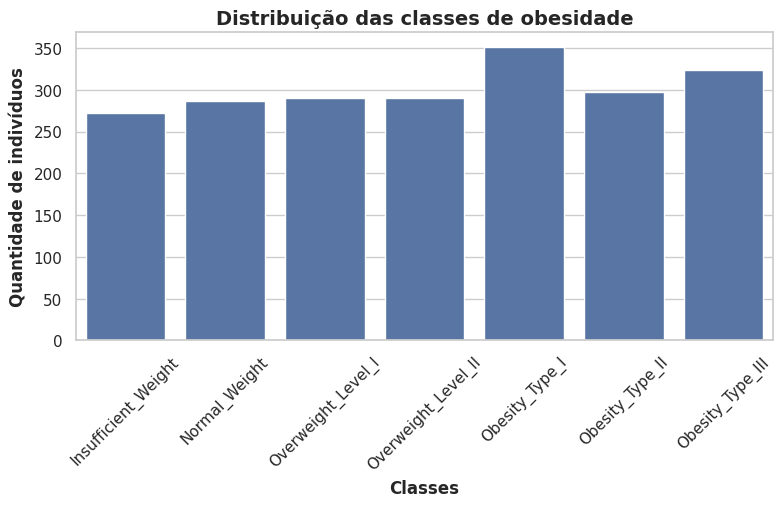

In [8]:
obesity_order = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]

plt.figure(figsize=(9,4))
sns.countplot(data=df, x="Obesity", order=obesity_order)
plt.xticks(rotation=45)
plt.title("Distribuição das classes de obesidade", fontsize=14, weight='bold')
plt.xlabel("Classes", weight='bold')
plt.ylabel("Quantidade de indivíduos", weight='bold')
plt.show()

## Criar cópia do dataframe para tratamentos auxiliares

In [9]:
df_eda = df.copy()

## Renomear colunas

In [10]:
def renomear_colunas(df):
    traducao = {
        'Gender': 'genero',
        'Age': 'idade',
        'Height': 'altura',
        'Weight': 'peso',
        'family_history': 'historico_familiar',
        'FAVC': 'come_alimentos_caloricos',
        'FCVC': 'consumo_vegetais',
        'NCP': 'numero_refeicoes_diarias',
        'CAEC': 'come_entre_refeicoes',
        'SMOKE': 'fuma',
        'CH2O': 'consumo_diario_agua',
        'SCC': 'monitora_calorias',
        'FAF': 'frequencia_atividade_fisica',
        'TUE': 'tempo_dispositivos',
        'CALC': 'consome_alcool',
        'MTRANS': 'meio_transporte',
        'Obesity': 'nivel_obesidade'
    }
    return df.rename(columns=traducao)


In [11]:
df_eda = renomear_colunas(df_eda)

In [12]:
df_eda.head()

,genero,idade,altura,peso,historico_familiar,come_alimentos_caloricos,consumo_vegetais,numero_refeicoes_diarias,come_entre_refeicoes,fuma,consumo_diario_agua,monitora_calorias,frequencia_atividade_fisica,tempo_dispositivos,consome_alcool,meio_transporte,nivel_obesidade
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Variáveis ordinais com ruído decimal

In [13]:
ordinal_noise = ["consumo_vegetais", "numero_refeicoes_diarias", "consumo_diario_agua", "frequencia_atividade_fisica", "tempo_dispositivos"]
df_eda[ordinal_noise].head(10)

,consumo_vegetais,numero_refeicoes_diarias,consumo_diario_agua,frequencia_atividade_fisica,tempo_dispositivos
0,2.0,3.0,2.0,0.0,1.0
1,3.0,3.0,3.0,3.0,0.0
2,2.0,3.0,2.0,2.0,1.0
3,3.0,3.0,2.0,2.0,0.0
4,2.0,1.0,2.0,0.0,0.0
5,2.0,3.0,2.0,0.0,0.0
6,3.0,3.0,2.0,1.0,0.0
7,2.0,3.0,2.0,3.0,0.0
8,3.0,3.0,2.0,1.0,1.0
9,2.0,3.0,2.0,1.0,1.0


### Arredondamento das variáveis decimais para número inteiro e estatísticas descritivas após arredondamento

In [14]:
for col in ordinal_noise:
    df_eda[col] = df_eda[col].round(0).astype(int)

In [15]:
df_eda[ordinal_noise].describe()

,consumo_vegetais,numero_refeicoes_diarias,consumo_diario_agua,frequencia_atividade_fisica,tempo_dispositivos
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,2.423496,2.687826,2.014685,1.006632,0.664614
std,0.583905,0.809680,0.688616,0.895462,0.674009
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,3.000000,2.000000,0.000000,0.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000
75%,3.000000,3.000000,2.000000,2.000000,1.000000
max,3.000000,4.000000,3.000000,3.000000,2.000000


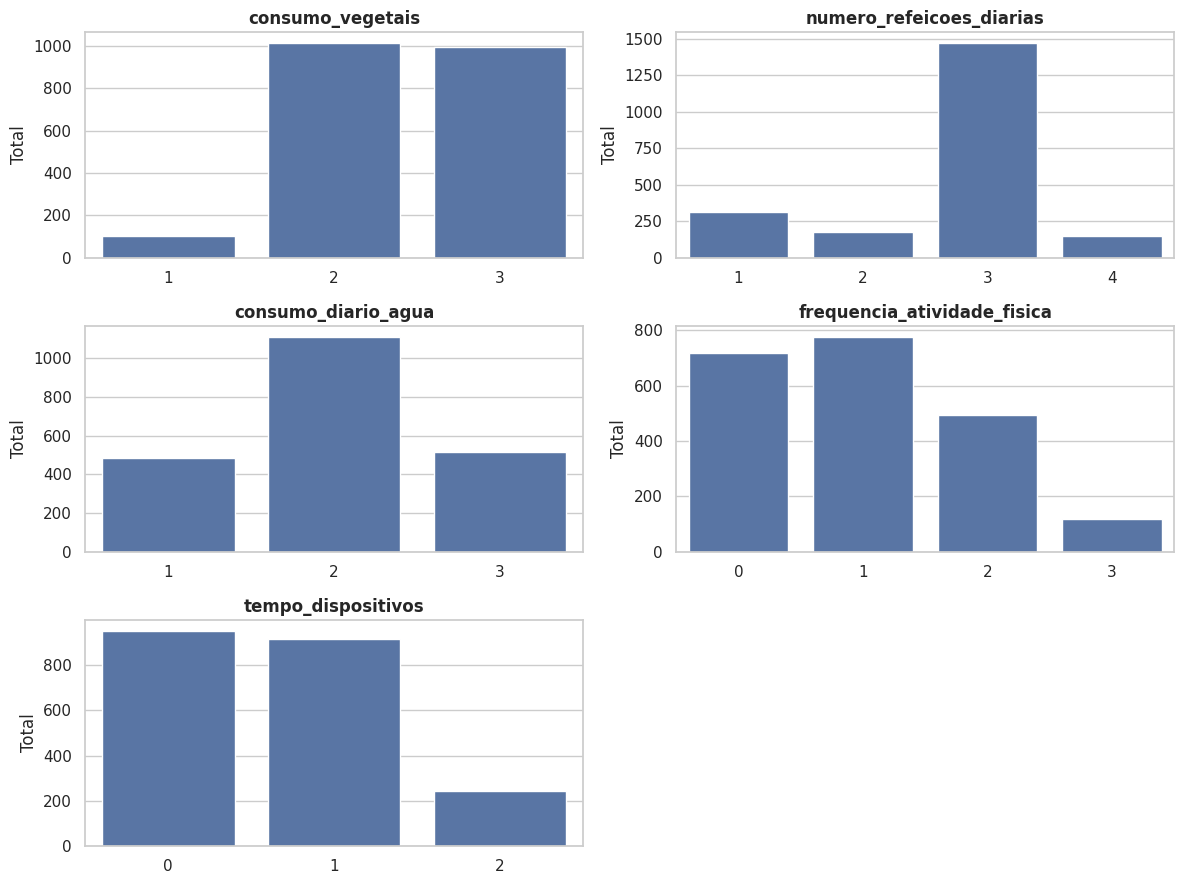

In [16]:
cols = ordinal_noise

fig, axes = plt.subplots(3, 2, figsize=(12, 9))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(data=df_eda, x=col, ax=axes[i])
    axes[i].set_title(col, weight = 'bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Total")

fig.delaxes(axes[-1]) # Remove subplot vazio (sobrou 1)
plt.tight_layout()
plt.show()

## Feature Engineering: criação do IMC (Índice de Massa Corporal)

In [17]:
df_eda["IMC"] = (df_eda["peso"] / (df_eda["altura"]**2)).round(2)

In [18]:
df_eda["IMC"].describe()

,IMC
count,2111.000000
mean,29.700137
std,8.011354
min,13.000000
25%,24.325000
50%,28.720000
75%,36.015000
max,50.810000


### Distribuição do IMC

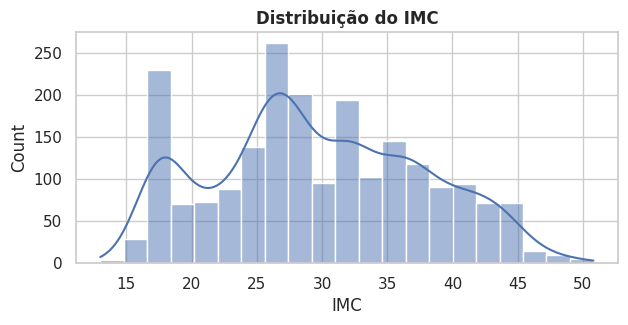

In [19]:
plt.figure(figsize=(7,3))
sns.histplot(df_eda["IMC"], kde=True)
plt.title("Distribuição do IMC", weight='bold')
plt.show()

### IMC por classe de obesidade

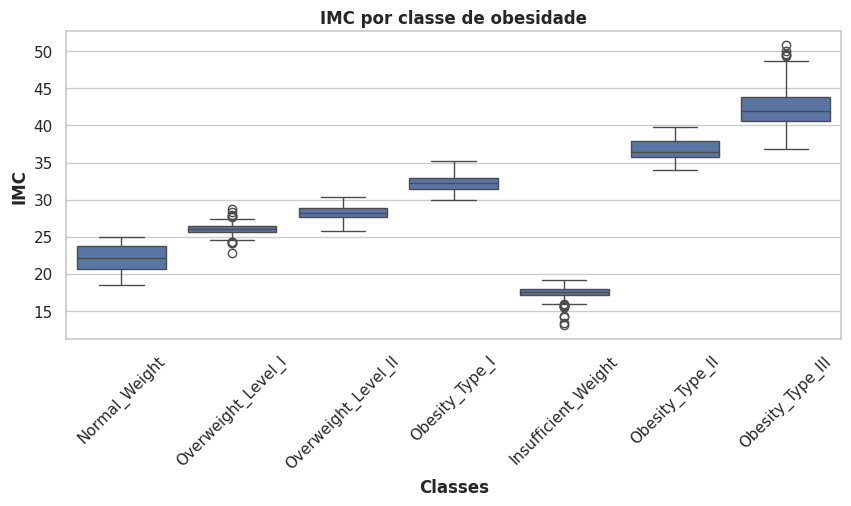

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_eda, x="nivel_obesidade", y="IMC")
plt.xticks(rotation=45)
plt.title("IMC por classe de obesidade", fontsize=12, weight='bold')
plt.xlabel("Classes", weight='bold')
plt.ylabel("IMC", weight='bold')
plt.show()

## Variáveis numéricas contínuas

In [21]:
num_cols = ["idade", "altura", "peso", "IMC"]
df_eda[num_cols].describe()

,idade,altura,peso,IMC
count,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,29.700137
std,6.345968,0.093305,26.191172,8.011354
min,14.000000,1.450000,39.000000,13.000000
25%,19.947192,1.630000,65.473343,24.325000
50%,22.777890,1.700499,83.000000,28.720000
75%,26.000000,1.768464,107.430682,36.015000
max,61.000000,1.980000,173.000000,50.810000


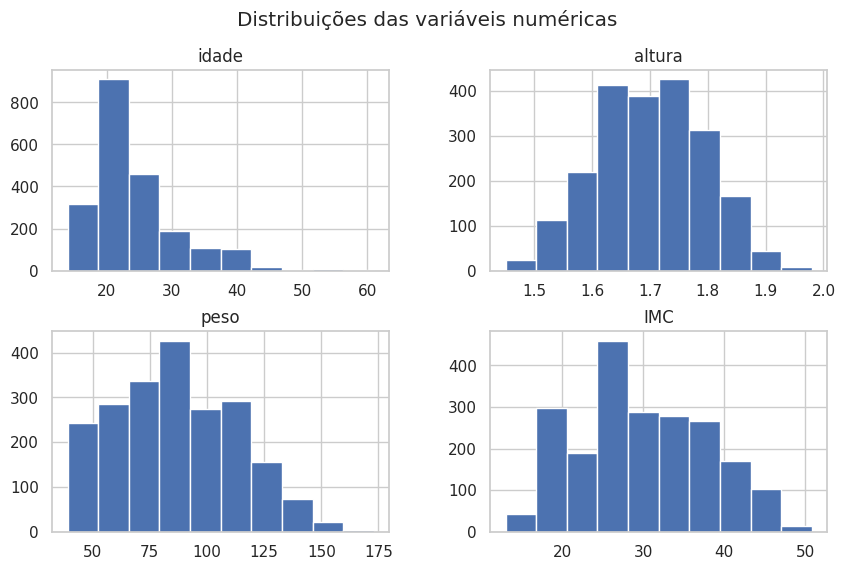

In [22]:
df_eda[num_cols].hist(figsize=(10,6))
plt.suptitle("Distribuições das variáveis numéricas")
plt.show()

## Variáveis categóricas nominais

In [23]:
df_eda["genero"].value_counts()

,count
genero,
Male,1068
Female,1043


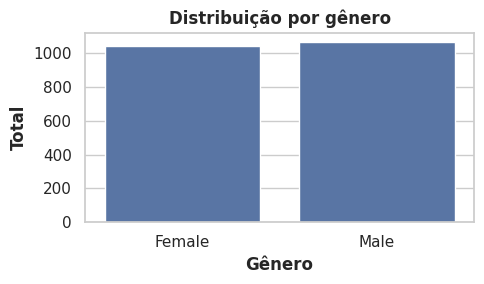

In [24]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_eda, x="genero")
plt.title("Distribuição por gênero", weight='bold')
plt.xlabel("Gênero", weight='bold')
plt.ylabel("Total", weight='bold')
plt.tight_layout()
plt.show()

In [25]:
df_eda["meio_transporte"].value_counts()

,count
meio_transporte,
Public_Transportation,1580
Automobile,457
Walking,56
Motorbike,11
Bike,7


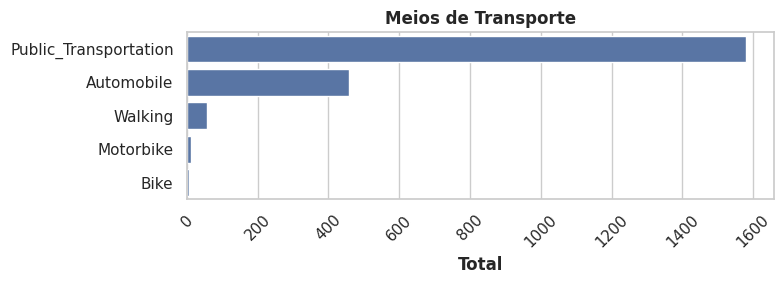

In [26]:
plt.figure(figsize=(8,3))
sns.countplot(data=df_eda, y="meio_transporte", order=df_eda["meio_transporte"].value_counts().index)
plt.xticks(rotation=30)
plt.title("Meios de Transporte", weight='bold')
plt.ylabel("")
plt.xlabel("Total", weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Variáveis binárias de hábitos

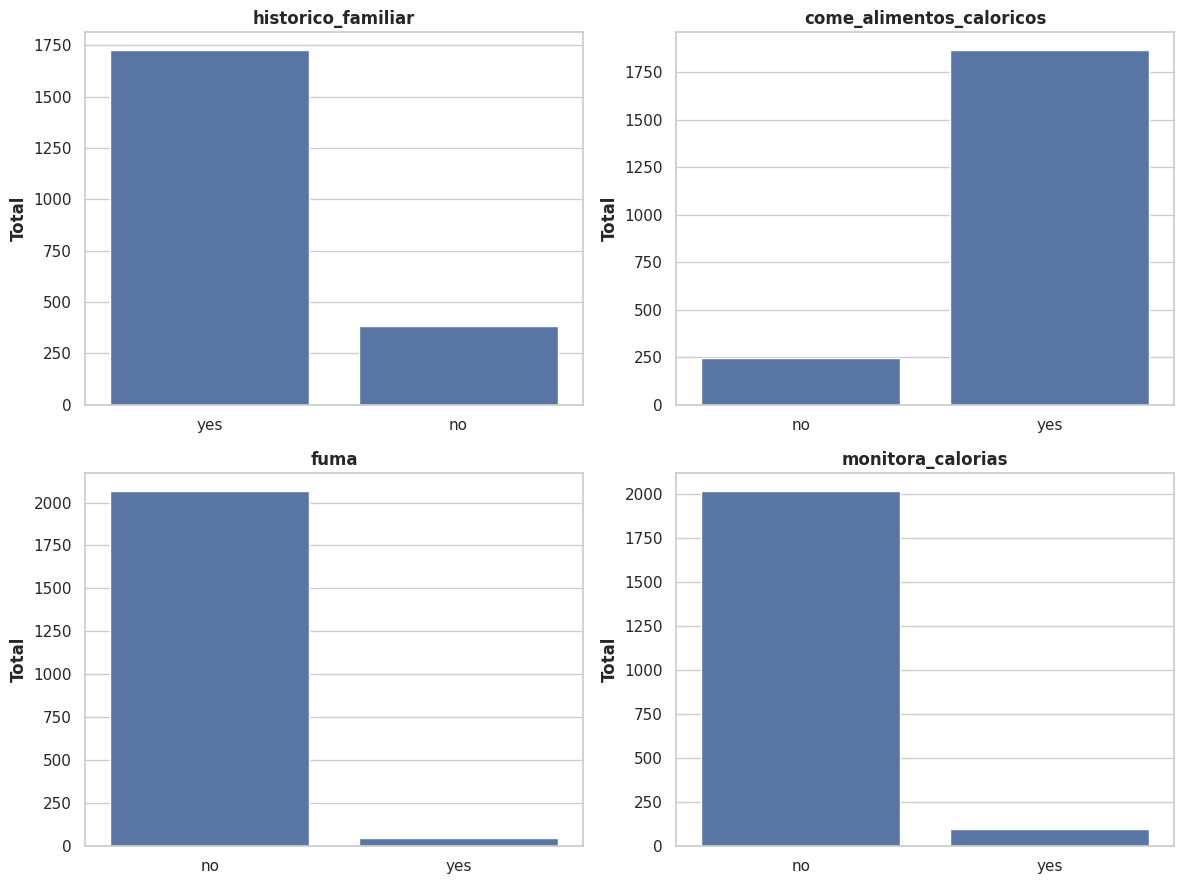

In [27]:
bin_cols = ["historico_familiar", "come_alimentos_caloricos", "fuma", "monitora_calorias"]

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
axes = axes.flatten()

for i, col in enumerate(bin_cols):
    sns.countplot(data=df_eda, x=col, ax=axes[i])
    axes[i].set_title(col,weight = 'bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Total", weight='bold')
plt.tight_layout()
plt.show()

## Variáveis ordinais de texto

In [28]:
df_eda["come_entre_refeicoes"].value_counts()

,count
come_entre_refeicoes,
Sometimes,1765
Frequently,242
Always,53
no,51


In [29]:
df_eda["consome_alcool"].value_counts()

,count
consome_alcool,
Sometimes,1401
no,639
Frequently,70
Always,1


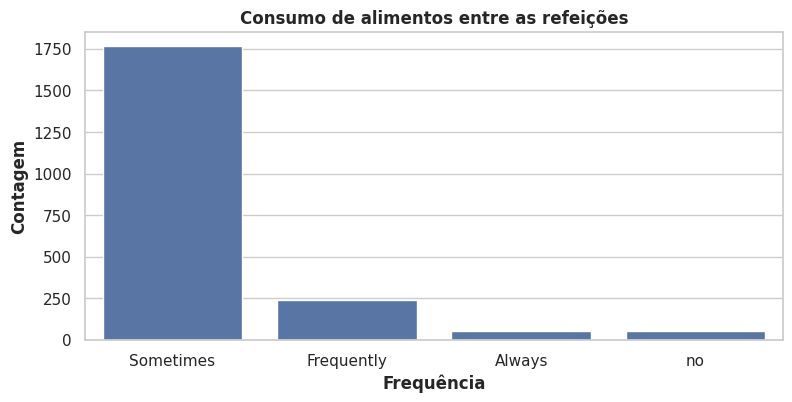

In [30]:
plt.figure(figsize=(9,4))
sns.countplot(data=df_eda, x="come_entre_refeicoes", order=df_eda["come_entre_refeicoes"].value_counts().index)
plt.title("Consumo de alimentos entre as refeições", weight='bold')
plt.xlabel("Frequência", weight='bold')
plt.ylabel("Contagem", weight='bold')
plt.show()

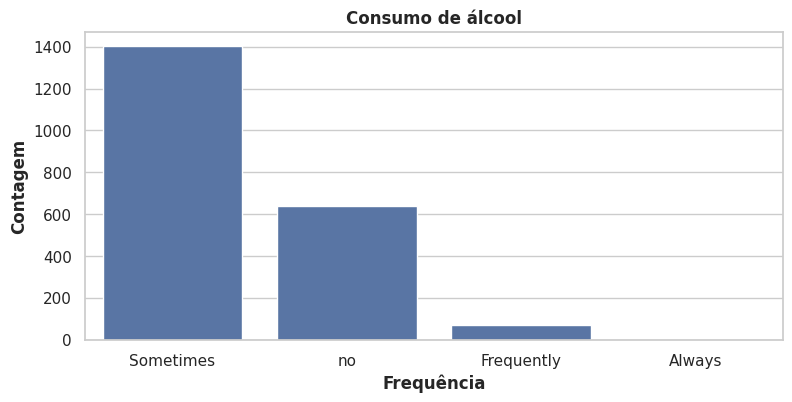

In [31]:
plt.figure(figsize=(9,4))
sns.countplot(data=df_eda, x="consome_alcool", order=df_eda["consome_alcool"].value_counts().index)
plt.title("Consumo de álcool", weight='bold')
plt.xlabel("Frequência", weight='bold')
plt.ylabel("Contagem", weight='bold')
plt.show()

## Criação da coluna binária ObeseBinary (Obeso e Não Obeso) para análise da influência dos hábitos na obesidade

In [32]:
obese_classes = ["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
df_eda["ObeseBinary"] = df_eda["nivel_obesidade"].apply(lambda x: 1 if x in obese_classes else 0)

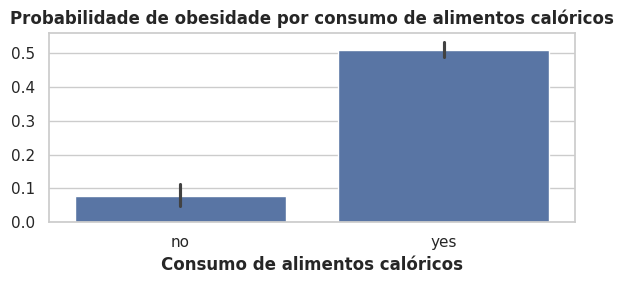

In [37]:
plt.figure(figsize=(6,3))
sns.barplot(data=df_eda, x="come_alimentos_caloricos", y="ObeseBinary", estimator=np.mean)
plt.title("Probabilidade de obesidade por consumo de alimentos calóricos", weight='bold')
plt.xlabel("Consumo de alimentos calóricos", weight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

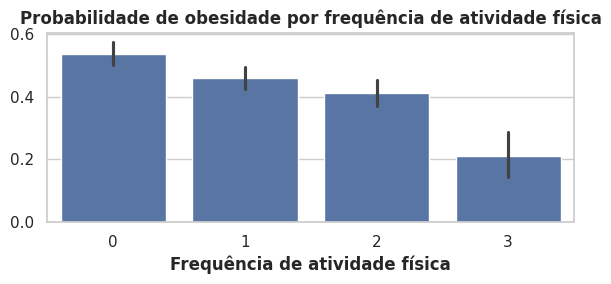

In [38]:
plt.figure(figsize=(6,3))
sns.barplot(data=df_eda, x="frequencia_atividade_fisica", y="ObeseBinary", estimator=np.mean)
plt.title("Probabilidade de obesidade por frequência de atividade física", weight='bold')
plt.xlabel("Frequência de atividade física", weight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

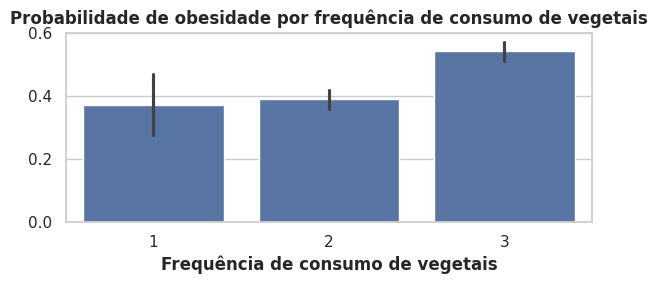

In [40]:
plt.figure(figsize=(6,3))
sns.barplot(data=df_eda, x="consumo_vegetais", y="ObeseBinary", estimator=np.mean)
plt.title("Probabilidade de obesidade por frequência de consumo de vegetais", weight='bold')
plt.xlabel("Frequência de consumo de vegetais", weight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

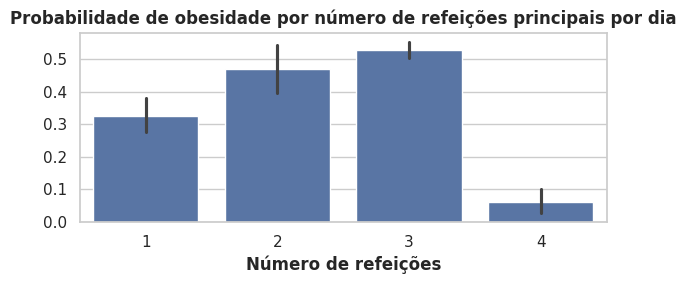

In [42]:
plt.figure(figsize=(6,3))
sns.barplot(data=df_eda, x="numero_refeicoes_diarias", y="ObeseBinary", estimator=np.mean)
plt.title("Probabilidade de obesidade por número de refeições principais por dia", weight='bold')
plt.xlabel("Número de refeições", weight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

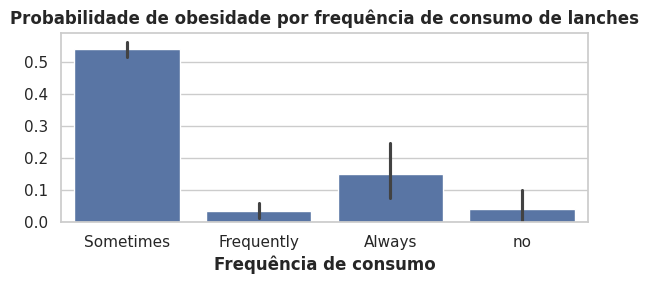

In [43]:
plt.figure(figsize=(6,3))
sns.barplot(data=df_eda, x="come_entre_refeicoes", y="ObeseBinary", estimator=np.mean)
plt.title("Probabilidade de obesidade por frequência de consumo de lanches", weight='bold')
plt.xlabel("Frequência de consumo", weight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(6,3))
sns.barplot(data=df_eda, x="come_entre_refeicoes", y="ObeseBinary", estimator=np.mean)
plt.title("Probabilidade de obesidade por frequência de consumo de lanches", weight='bold')
plt.xlabel("Frequência de consumo", weight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

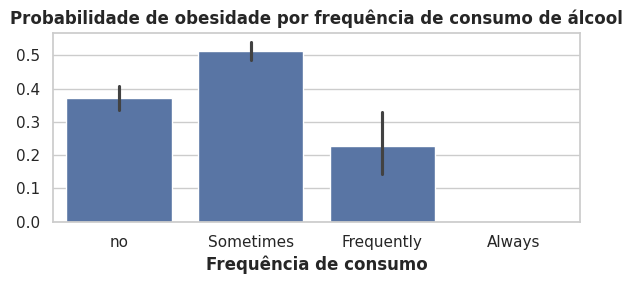

In [44]:
plt.figure(figsize=(6,3))
sns.barplot(data=df_eda, x="consome_alcool", y="ObeseBinary", estimator=np.mean)
plt.title("Probabilidade de obesidade por frequência de consumo de álcool", weight='bold')
plt.xlabel("Frequência de consumo", weight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

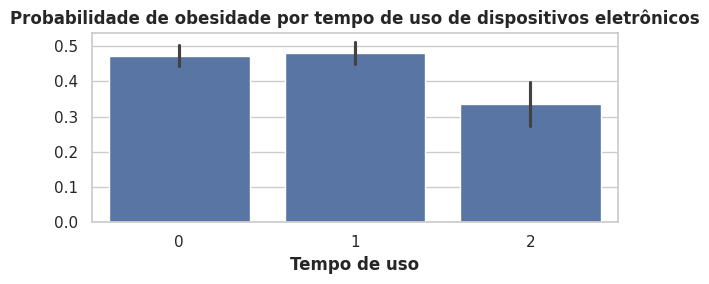

In [45]:
plt.figure(figsize=(6,3))
sns.barplot(data=df_eda, x="tempo_dispositivos", y="ObeseBinary", estimator=np.mean)
plt.title("Probabilidade de obesidade por tempo de uso de dispositivos eletrônicos", weight='bold')
plt.xlabel("Tempo de uso", weight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

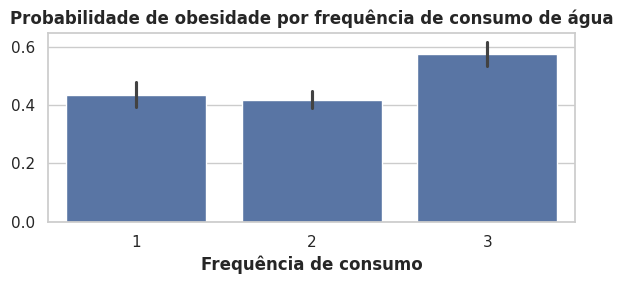

In [46]:
plt.figure(figsize=(6,3))
sns.barplot(data=df_eda, x="consumo_diario_agua", y="ObeseBinary", estimator=np.mean)
plt.title("Probabilidade de obesidade por frequência de consumo de água", weight='bold')
plt.xlabel("Frequência de consumo", weight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

In [47]:
df_eda["numero_refeicoes_diarias"].value_counts()

,count
numero_refeicoes_diarias,
3,1470
1,316
2,176
4,149


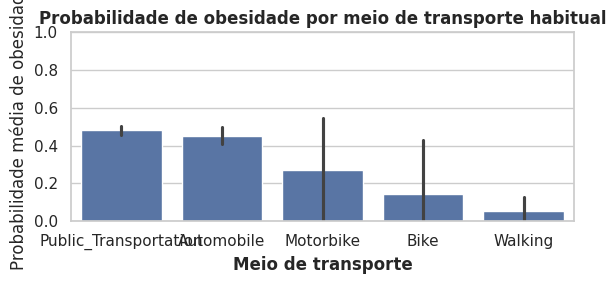

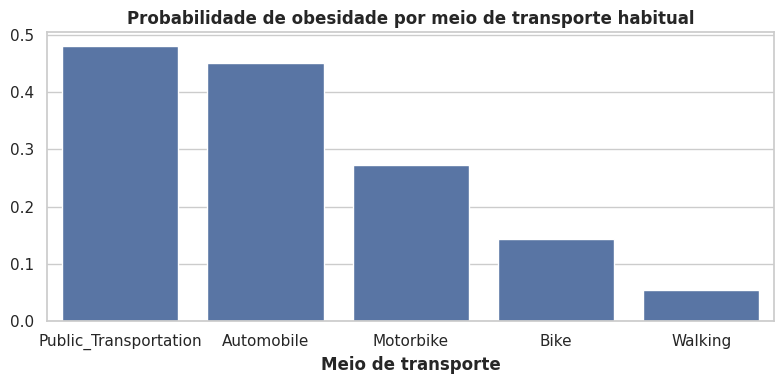

In [53]:
order = (df_eda.groupby("meio_transporte")["ObeseBinary"].mean().sort_values(ascending=False).index)

plt.figure(figsize=(8,4))
sns.barplot(data=df_eda, x="meio_transporte", y="ObeseBinary", estimator=np.mean, order=order, errorbar=None)
plt.title("Probabilidade de obesidade por meio de transporte habitual", weight='bold')
plt.xlabel("Meio de transporte", weight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()